In [ ]:
##install the default Java Runtime Environment (JRE) and then checks the installed Java version.
!apt -get install default-jre
!java -version

E: Command line option 'g' [from -get] is not understood in combination with the other options.
openjdk version "11.0.20" 2023-07-18
OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
##install the 'h2o' package
!pip install h2o

In [ ]:
##imports the 'h2o' package
import h2o

In [ ]:
##initializes the H2O environment
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_iy0hi2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.162 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
##imports the 'H2OAutoML' class from the 'h2o.automl' module, enabling the use of H2O's automated machine learning capabilities.
from h2o.automl import H2OAutoML

In [ ]:
df = h2o.import_file("/content/kidney_disease.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.describe()

Rows:400
Cols:26

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
type,int,int,int,real,int,int,enum,enum,enum,enum,int,real,real,real,real,real,int,int,real,enum,enum,enum,enum,enum,enum,enum
mins,0.0,2.0,50.0,1.005,0.0,0.0,,,,,22.0,1.5,0.4,4.5,2.5,3.1,9.0,2200.0,2.1,,,,,,,
mean,199.5,51.4833759590793,76.46907216494847,1.0174079320113314,1.0169491525423722,0.45014245014244997,,,,,148.03651685393265,57.425721784776904,3.072454308093998,137.5287539936102,4.627243589743593,12.526436781609192,38.88449848024318,8406.122448979588,4.707434944237918,,,,,,,
maxs,399.0,90.0,180.0,1.025,5.0,5.0,,,,,490.0,391.0,76.0,163.0,47.0,17.8,54.0,26400.0,8.0,,,,,,,
sigma,115.61430130683084,17.16971408926224,13.68363749352527,0.005716616974376757,1.3526789127628445,1.099191251885407,,,,,79.28171423511773,50.50300584922251,5.741126066859788,10.408752051798777,3.1939041765566945,2.912586608826765,8.990104814740933,2944.4741904103385,1.0253232655721791,,,,,,,
zeros,1,0,0,0,199,290,,,,,0,0,0,0,0,0,0,0,0,,,,,,,
missing,0,9,12,47,46,49,152,65,4,4,44,19,17,87,88,52,71,106,131,2,2,2,1,1,1,0
0,0.0,48.0,80.0,1.02,1.0,0.0,,normal,notpresent,notpresent,121.0,36.0,1.2,nan,nan,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.02,4.0,0.0,,normal,notpresent,notpresent,nan,18.0,0.8,nan,nan,11.3,38.0,6000.0,nan,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,nan,nan,9.6,31.0,7500.0,nan,no,yes,no,poor,no,yes,ckd


In [ ]:
df.types

{'id': 'int',
 'age': 'int',
 'bp': 'int',
 'sg': 'real',
 'al': 'int',
 'su': 'int',
 'rbc': 'enum',
 'pc': 'enum',
 'pcc': 'enum',
 'ba': 'enum',
 'bgr': 'int',
 'bu': 'real',
 'sc': 'real',
 'sod': 'real',
 'pot': 'real',
 'hemo': 'real',
 'pcv': 'int',
 'wc': 'int',
 'rc': 'real',
 'htn': 'enum',
 'dm': 'enum',
 'cad': 'enum',
 'appet': 'enum',
 'pe': 'enum',
 'ane': 'enum',
 'classification': 'enum'}

In [ ]:
##splits the 'df' H2O DataFrame into training, testing, and validation sets using specified ratios.
x_train,x_test,valid = df.split_frame(ratios=[.7, .15])

In [ ]:
x_train

id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.02,1,0,,normal,notpresent,notpresent,121,36,1.2,nan,nan,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,,normal,notpresent,notpresent,nan,18,0.8,nan,nan,11.3,38,6000,nan,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,nan,nan,9.6,31,7500,nan,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
5,60,90,1.015,3,0,,,notpresent,notpresent,74,25,1.1,142,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,,normal,notpresent,notpresent,100,54,24,104,4,12.4,36,nan,nan,no,no,no,good,no,no,ckd
7,24,nan,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,nan,nan,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
10,50,60,1.01,2,4,,abnormal,present,notpresent,490,55,4,nan,nan,9.4,28,nan,nan,yes,yes,no,good,no,yes,ckd
11,63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd


In [ ]:
##prepares the feature and target variables for a classification task by extracting the necessary columns from the 'df' DataFrame.
y = "classification"
x = df.columns
x.remove(y)
x.remove("id")

In [ ]:
##initializes an H2O AutoML instance with specific configuration settings for model generation and evaluation.
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
##display information about NVIDIA GPUs in the system.
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
##initiates the training of multiple machine learning models using H2O's AutoML on the provided datasets.
aml.train(x = x, y = y, training_frame = x_train, validation_frame=valid)

AutoML progress: |
15:32:21.12: Project: AutoML_3_20230814_153221
15:32:21.12: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:32:21.12: Setting stopping tolerance adaptively based on the training frame: 0.05
15:32:21.12: Build control seed: 10
15:32:21.26: training frame: Frame key: AutoML_3_20230814_153221_training_py_22_sid_915b    cols: 26    rows: 287  chunks: 1    size: 15348  checksum: 8977112680693005080
15:32:21.26: validation frame: Frame key: py_24_sid_915b    cols: 26    rows: 57  chunks: 1    size: 9280  checksum: 1102949375874255489
15:32:21.26: leaderboard frame: Frame key: py_24_sid_915b    cols: 26    rows: 57  chunks: 1    size: 9280  checksum: 1102949375874255489
15:32:21.26: blending frame: NULL
15:32:21.26: response column: classification
15:32:21.26: fold column: null
15:32:21.27: weights column: null
15:32:21.27: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20230814_153221


GLM Model: summary
    family       link         regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  -----------  -----------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    multinomial  multinomial  Ridge ( lambda = 0.003368 )  nlambda = 30, lambda.max = 33.678, lambda.min = 0.003368, lambda.1se = -1.0  105                           102                            104                     AutoML_3_20230814_153221_training_py_22_sid_915b

ModelMetricsMultinomialGLM: glm
** Reported on train data. **

MSE: 0.007289390070792439
RMSE: 0.08537792496185674
LogLoss: 0.03567608008677679
Null degrees of freedom: 286
Residual degrees of freedom: 182
Null deviance: 402.0728527338168
Residual deviance: 20.47806996980988
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error       Rate
-----  -  --------  ----------  -------
177    0  0         0           0 / 177
2      0  0         1           2 / 2
0      0  108       0           0 / 108
179    0  108       0.00696864  2 / 287

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.993031
2    1
3    1

ModelMetricsMultinomialGLM: glm
** Reported on validation data. **

MSE: 0.007213548632164002
RMSE: 0.08493261230036435
LogLoss: 0.04178620858269921
Null degrees of freedom: 56
Residual degrees of freedom: -48
Null deviance: 77.8247543338623
Residual deviance: 4.7636277784277095
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error    Rate
-----  -  --------  -------  ------
34     0  0         0        0 / 34
0      0  0         nan      0 / 0
0      0  23        0        0 / 23
34     0  23        0        0 / 57

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       deviance_test        alpha    iterations    training_rmse        training_logloss     training_r2         training_classification_error    training_auc    training_pr_auc    validation_rmse      validation_logloss    validation_r2       validation_classification_error    validation_auc    validation_pr_auc
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------------------  -------  ------------  -------------------  -------------------  ------------------  -------------------------------  --------------  -----------------  -------------------  --------------------  ------------------  ---------------------------------  ----------------  -------------------
     2023-08-14 15:32:22  0.000 sec   2            .34E2     94            1.3207918218770969   1.2874505976211903   0.0
     2023-08-14 15:32:22  0.013 sec   4            .25E2     97            1.2943813739423102   1.2618275691766525   0.0
     2023-08-14 1

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
##generates a leaderboard of trained models from the completed AutoML run.
lb = aml.leaderboard

In [ ]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GLM_1_AutoML_3_20230814_153221,0,0.0417862,0.0849326,0.00721355
GBM_4_AutoML_3_20230814_153221,0,0.000625103,0.00453336,2.05513e-05
GBM_2_AutoML_3_20230814_153221,0,0.000280074,0.0018417,3.39187e-06
GBM_3_AutoML_3_20230814_153221,0,0.00306792,0.0188387,0.000354898
GBM_1_AutoML_3_20230814_153221,0,0.027904,0.0496438,0.00246451
XGBoost_2_AutoML_3_20230814_153221,0,0.0424359,0.0818756,0.00670361
DRF_1_AutoML_3_20230814_153221,0,0.0577815,0.0979084,0.00958606
XGBoost_1_AutoML_3_20230814_153221,0.00980392,0.0922123,0.13261,0.0175853
XGBoost_3_AutoML_3_20230814_153221,0.0144928,0.0288599,0.0787543,0.00620223
XRT_1_AutoML_3_20230814_153221,0.0144928,0.111262,0.145824,0.0212645


In [ ]:
###leader model from the AutoML run to make predictions on the test dataset.
pred=aml.leader.predict(x_test)


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
pred.head()

predict,ckd,ckd,notckd
ckd,0.997255,0.00168416,0.00106073
ckd,0.983292,0.0166939,1.42716e-05
ckd,0.994469,0.000733327,0.00479786
ckd,0.8608,0.138134,0.00106545
ckd,0.995911,0.00279505,0.00129425
ckd,0.999991,9.26151e-06,1.66257e-07
ckd,0.998084,0.00068841,0.00122755
ckd,0.630839,0.000633598,0.368527
ckd,0.99364,0.00581392,0.000545643
ckd,0.980714,0.0169832,0.00230308


In [ ]:
##evaluates the performance of the leader model from the AutoML run on the test dataset.
aml.leader.model_performance(x_test)

ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.012466298129053572
RMSE: 0.11165257779851558
LogLoss: 0.05400470093200782
Null degrees of freedom: 55
Residual degrees of freedom: -49
Null deviance: 72.90594132389384
Residual deviance: 6.048526504384876
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error      Rate
-----  -  --------  ---------  ------
36     0  1         0.027027   1 / 37
0      0  0         nan        0 / 0
0      0  19        0          0 / 19
36     0  20        0.0178571  1 / 56

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.982143
2    1
3    1

In [ ]:
##retrieves a list of model IDs from the leaderboard of the AutoML run.
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['GLM_1_AutoML_3_20230814_153221',
 'GBM_4_AutoML_3_20230814_153221',
 'GBM_2_AutoML_3_20230814_153221',
 'GBM_3_AutoML_3_20230814_153221',
 'GBM_1_AutoML_3_20230814_153221',
 'XGBoost_2_AutoML_3_20230814_153221',
 'DRF_1_AutoML_3_20230814_153221',
 'XGBoost_1_AutoML_3_20230814_153221',
 'XGBoost_3_AutoML_3_20230814_153221',
 'XRT_1_AutoML_3_20230814_153221']

In [ ]:
##retrieves a specific model from H2O using its ID from the list of model IDs.
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_3_20230814_153221


Model Summary: 
    number_of_trees
--  -----------------
    45

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.011332031931264776
RMSE: 0.10645201703708942
LogLoss: 0.0647463461177842
Mean Per-Class Error: 0.3333333333333333
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error       Rate
-----  -  --------  ----------  -------
177    0  0         0           0 / 177
2      0  0         1           2 / 2
0      0  108       0           0 / 108
179    0  108       0.00696864  2 / 287

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.993031
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.006703613706450989
RMSE: 0.08187559896850213
LogLoss: 0.04243585411317369
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error    Rate
-----  -  --------  -------  ------
34     0  0         0        0 / 34
0      0  0         nan      0 / 0
0      0  23        0        0 / 23
34     0  23        0        0 / 57

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-08-14 15:32:23  0.003 sec   0                  0.666667         1.09861             0.623693                         nan             nan                0.666667           1.09861               0.596491                           nan               nan
    2023-08-14 15:32:24  0.852 sec   5                  0.249601         0.273339            0.0278746                        nan             nan                0.257384           0.280055              0.0350877                          nan               nan
    2023-08-14 15:32:24  0.909 sec   10                 0.146627         0.120565            0.0174216                        nan             nan                0.135428           0.107913              0                                  nan               nan
    2023-08-14 15:32:24  0.966 sec   15                 0.117808         0.0808523           0.010453                         nan             nan                0.0832218          0.0537677             0                                  nan               nan
    2023-08-14 15:32:25  1.749 sec   20                 0.112809         0.0724612           0.00696864                       nan             nan                0.0750398          0.0429106             0                                  nan               nan
    2023-08-14 15:32:25  1.799 sec   25                 0.108613         0.067755            0.00696864                       nan             nan                0.0800168       

In [ ]:
##retrieves a specific XGBoost model from H2O using its ID and assigns it to the 'out' variable.
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
##retrieves and displays the hyperparameter settings of the XGBoost model stored in the 'out' variable.
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_3_20230814_153221',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_3_20230814_153221'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230814_153221_training_py_22_sid_915b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230814_153221_training_py_22_sid_915b'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20230814_153221_training_py_22_sid_915b',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20230814_153221_training_py_22_sid_915b'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    's

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()


({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'multi:softprob',
  'min_child_weight': 5.0,
  'nthread': 2,
  'seed': 13,
  'num_class': 3,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 45)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_3_20230814_153221


Model Summary: 
    number_of_trees
--  -----------------
    45

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.011332031931264776
RMSE: 0.10645201703708942
LogLoss: 0.0647463461177842
Mean Per-Class Error: 0.3333333333333333
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error       Rate
-----  -  --------  ----------  -------
177    0  0         0           0 / 177
2      0  0         1           2 / 2
0      0  108       0           0 / 108
179    0  108       0.00696864  2 / 287

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.993031
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.006703613706450989
RMSE: 0.08187559896850213
LogLoss: 0.04243585411317369
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error    Rate
-----  -  --------  -------  ------
34     0  0         0        0 / 34
0      0  0         nan      0 / 0
0      0  23        0        0 / 23
34     0  23        0        0 / 57

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-08-14 15:32:23  0.003 sec   0                  0.666667         1.09861             0.623693                         nan             nan                0.666667           1.09861               0.596491                           nan               nan
    2023-08-14 15:32:24  0.852 sec   5                  0.249601         0.273339            0.0278746                        nan             nan                0.257384           0.280055              0.0350877                          nan               nan
    2023-08-14 15:32:24  0.909 sec   10                 0.146627         0.120565            0.0174216                        nan             nan                0.135428           0.107913              0                                  nan               nan
    2023-08-14 15:32:24  0.966 sec   15                 0.117808         0.0808523           0.010453                         nan             nan                0.0832218          0.0537677             0                                  nan               nan
    2023-08-14 15:32:25  1.749 sec   20                 0.112809         0.0724612           0.00696864                       nan             nan                0.0750398          0.0429106             0                                  nan               nan
    2023-08-14 15:32:25  1.799 sec   25                 0.108613         0.067755            0.00696864                       nan             nan                0.0800168       

In [ ]:
##retrieves a specific GBM (Gradient Boosting Machine) model from H2O using its ID and assigns it to the 'out_gbm' variable.
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
confusion_matrix = out.confusion_matrix(df)
print(confusion_matrix)

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error    Rate
-----  -  --------  -------  -------
248    0  0         0        0 / 248
2      0  0         1        2 / 2
0      0  150       0        0 / 150
250    0  150       0.005    2 / 400


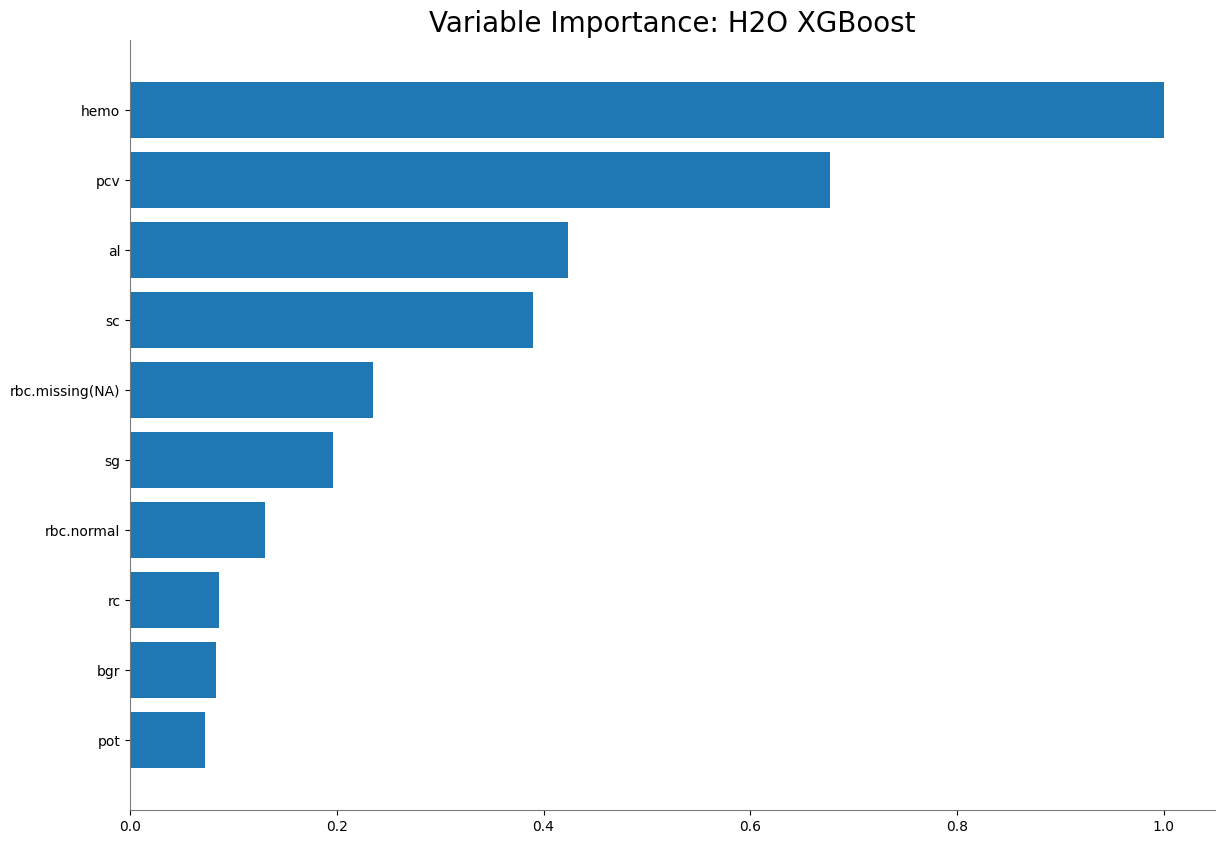

<Figure size 640x480 with 0 Axes>

In [ ]:
##generates and displays a variable importance plot for the trained model 'out'.
out.varimp_plot()

In [ ]:
# Define features and target column
feature_columns = df.columns[:-1]
target_column = 'target_column'


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the Random Forest model
rf_model = H2ORandomForestEstimator(
    seed=70,
    ntrees=90,  # Number of trees in the forest
    max_depth=20  # Maximum depth of each tree
)

In [ ]:
# Train the Random Forest model
rf_model.train(x=feature_columns, y="classification", training_frame=x_train, validation_frame=valid)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1692026302068_35


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    90                 270                         38667                  1            10           3.76667       2             18            6.8037

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.011749606386013463
RMSE: 0.10839560132225598
LogLoss: 0.06167423947723931
Mean Per-Class Error: 0.3333333333333333
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error       Rate
-----  -  --------  ----------  -------
177    0  0         0           0 / 177
2      0  0         1           2 / 2
0      0  108       0           0 / 108
179    0  108       0.00696864  2 / 287

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.993031
2    0.996516
3    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.003869195008935634
RMSE: 0.06220285370411581
LogLoss: 0.03771683876736186
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
ckd    ckd	    notckd    Error    Rate
-----  -  --------  -------  ------
34     0  0         0        0 / 34
0      0  0         nan      0 / 0
0      0  23        0        0 / 23
34     0  23        0        0 / 57

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss      training_classification_error    training_auc    training_pr_auc    validation_rmse       validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
---  -------------------  ----------  -----------------  -------------------  --------------------  -------------------------------  --------------  -----------------  --------------------  --------------------  ---------------------------------  ----------------  -------------------
     2023-08-14 15:33:35  0.015 sec   0.0                nan                  nan                   nan                              nan             nan                nan                   nan                   nan                                nan               nan
     2023-08-14 15:33:35  0.024 sec   1.0                0.18101013361388904  0.7511351478026999    0.030612244897959183             nan             nan                0.14194374397638196   0.6228310824754142    0.0                                nan               nan
     2023-08-14 15:33:35  0.026 sec   2.0                0.1613123817728247   0.6578038076314874    0.024096385542168676             nan             nan                0.03174556179829018   0.009569223348396117  0.0                                nan               nan
     2023-08-14 15:33:35  0.029 sec   3.0                0.17071455337539287  0.5419278667922058    0.027777777777777776             nan             nan                0.02218458869548792   0.008612195969507552  0

In [ ]:
# Make predictions on the test set
predictions = rf_model.predict(x_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Convert predictions to a Python list
y_pred = predictions.as_data_frame()['predict'].tolist()

In [ ]:
# Extract actual target values from the test set
y_test = x_test["classification"].as_data_frame()["classification"].tolist()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9821428571428571


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1-score, precision, and recall
f1 = f1_score(y_test, y_pred, pos_label='ckd')
precision = precision_score(y_test, y_pred, pos_label='ckd')
recall = recall_score(y_test, y_pred, pos_label='ckd')

# Display the metrics
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1-score: 0.9866666666666666
Precision: 0.9736842105263158
Recall: 1.0
